In [2]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.getcwd())
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [6]:
path = get_path('hntn_train_validate_and_test_wn18_200d_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_cost.csv'

In [7]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,0.008311,0.008337,0.008247,0.013324,0.013312,0.013559
1,0.004777,0.004840,0.004812,0.004527,0.004480,0.004535
2,0.003934,0.003921,0.003901,0.003427,0.003344,0.003370
3,0.003924,0.003830,0.003895,0.003992,0.003911,0.003906
4,0.003502,0.003411,0.003391,0.003414,0.003311,0.003323


In [8]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,0,0.008311,0.008337,0.008247,0.013324,0.013312,0.013559
1,1,0.004777,0.004840,0.004812,0.004527,0.004480,0.004535
2,2,0.003934,0.003921,0.003901,0.003427,0.003344,0.003370
3,3,0.003924,0.003830,0.003895,0.003992,0.003911,0.003906
4,4,0.003502,0.003411,0.003391,0.003414,0.003311,0.003323


In [9]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,0,0.008311,0.008337,0.008247,0.013324,0.013312,0.013559
1,1,0.004777,0.004840,0.004812,0.004527,0.004480,0.004535
2,2,0.003934,0.003921,0.003901,0.003427,0.003344,0.003370
3,3,0.003924,0.003830,0.003895,0.003992,0.003911,0.003906
4,4,0.003502,0.003411,0.003391,0.003414,0.003311,0.003323


In [10]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,1,0.008311,0.008337,0.008247,0.013324,0.013312,0.013559
1,2,0.004777,0.004840,0.004812,0.004527,0.004480,0.004535
2,3,0.003934,0.003921,0.003901,0.003427,0.003344,0.003370
3,4,0.003924,0.003830,0.003895,0.003992,0.003911,0.003906
4,5,0.003502,0.003411,0.003391,0.003414,0.003311,0.003323


In [11]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_hypothesis'], axis=1)
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_training_hypothesis,cost_validation_hypothesis
0,1,0.008311,0.008337,0.013324,0.013312
1,2,0.004777,0.004840,0.004527,0.004480
2,3,0.003934,0.003921,0.003427,0.003344
3,4,0.003924,0.003830,0.003992,0.003911
4,5,0.003502,0.003411,0.003414,0.003311


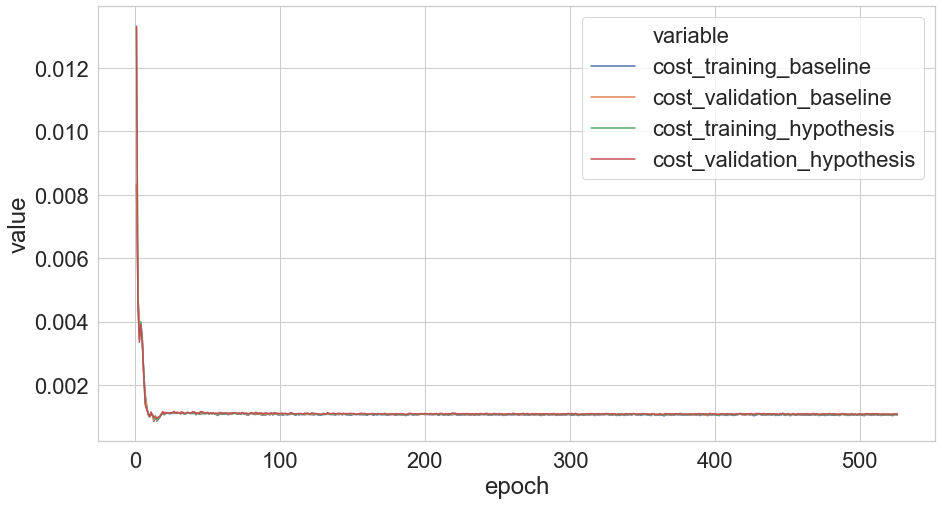

In [13]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost, ['epoch']))
plt.savefig('WN18_Cost_Results.png', bbox_inches = "tight", format='PNG')

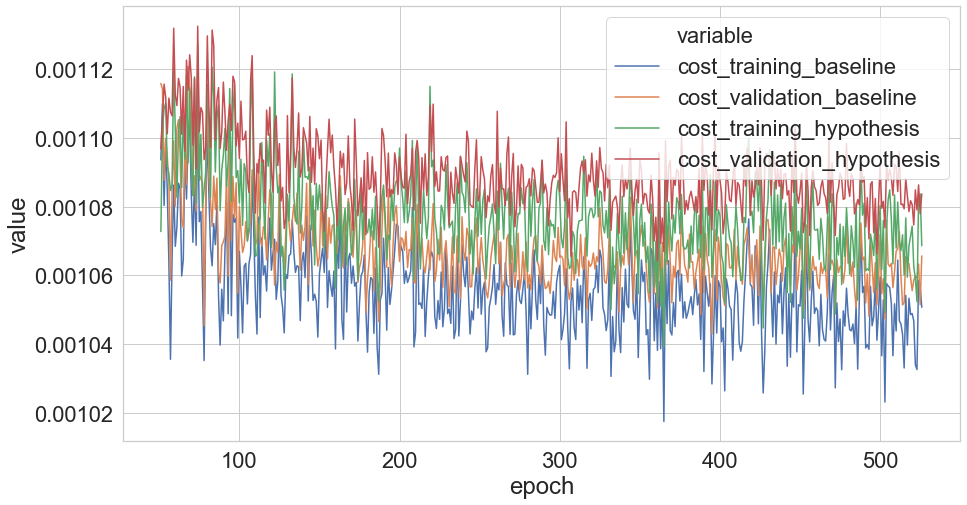

In [15]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[50:], ['epoch']))
plt.savefig('WN18_Cost_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [28]:
path = get_path('hntn_train_validate_and_test_wn18_200d_hits_at_10.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_hits_at_10.csv'

In [29]:
results_hits_at_10 = pd.read_csv(path)
results_hits_at_10.head()

,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,0.0010,0.0007,0.0008,0.0000,0.0003,0.0005
1,0.0317,0.0341,0.0328,0.0254,0.0291,0.0300
2,0.0364,0.0364,0.0348,0.0381,0.0378,0.0355
3,0.0368,0.0347,0.0338,0.0430,0.0422,0.0379
4,0.0405,0.0410,0.0388,0.0444,0.0489,0.0430


In [30]:
results_hits_at_10 = results_hits_at_10.reset_index()
results_hits_at_10.head()

,index,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,0,0.0010,0.0007,0.0008,0.0000,0.0003,0.0005
1,1,0.0317,0.0341,0.0328,0.0254,0.0291,0.0300
2,2,0.0364,0.0364,0.0348,0.0381,0.0378,0.0355
3,3,0.0368,0.0347,0.0338,0.0430,0.0422,0.0379
4,4,0.0405,0.0410,0.0388,0.0444,0.0489,0.0430


In [31]:
results_hits_at_10 = results_hits_at_10.rename(columns={'index': 'epoch'})
results_hits_at_10.head()

,epoch,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,0,0.0010,0.0007,0.0008,0.0000,0.0003,0.0005
1,1,0.0317,0.0341,0.0328,0.0254,0.0291,0.0300
2,2,0.0364,0.0364,0.0348,0.0381,0.0378,0.0355
3,3,0.0368,0.0347,0.0338,0.0430,0.0422,0.0379
4,4,0.0405,0.0410,0.0388,0.0444,0.0489,0.0430


In [32]:
results_hits_at_10['epoch'] += 1
results_hits_at_10.head()

,epoch,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,1,0.0010,0.0007,0.0008,0.0000,0.0003,0.0005
1,2,0.0317,0.0341,0.0328,0.0254,0.0291,0.0300
2,3,0.0364,0.0364,0.0348,0.0381,0.0378,0.0355
3,4,0.0368,0.0347,0.0338,0.0430,0.0422,0.0379
4,5,0.0405,0.0410,0.0388,0.0444,0.0489,0.0430


In [33]:
results_hits_at_10_test = results_hits_at_10[['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis']]
results_hits_at_10_test.head()

,hits_at_10_test_baseline,hits_at_10_test_hypothesis
0,0.0008,0.0005
1,0.0328,0.0300
2,0.0348,0.0355
3,0.0338,0.0379
4,0.0388,0.0430


In [34]:
results_hits_at_10_test.max()

hits_at_10_test_baseline      0.9574
hits_at_10_test_hypothesis    0.9569
dtype: float64

In [35]:
results_hits_at_10 = results_hits_at_10.drop(['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis'], axis=1)
results_hits_at_10.head()

,epoch,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis
0,1,0.0010,0.0007,0.0000,0.0003
1,2,0.0317,0.0341,0.0254,0.0291
2,3,0.0364,0.0364,0.0381,0.0378
3,4,0.0368,0.0347,0.0430,0.0422
4,5,0.0405,0.0410,0.0444,0.0489


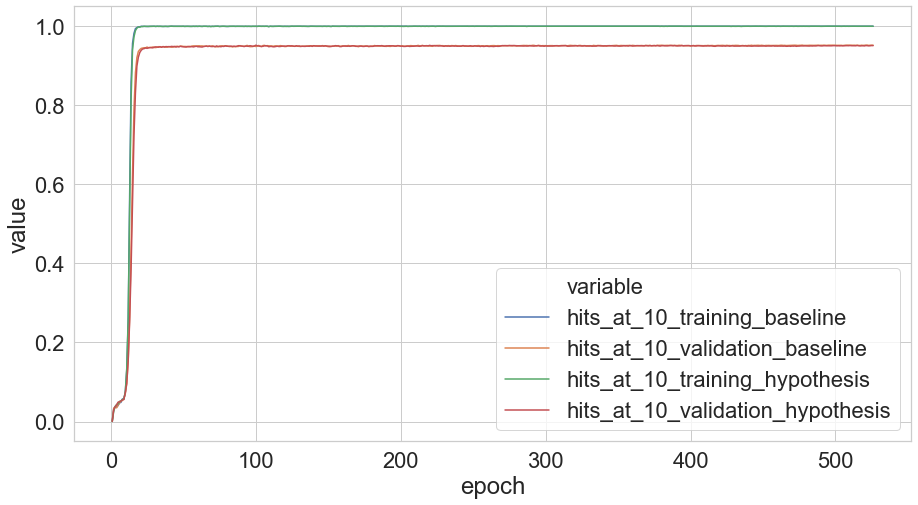

In [36]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10, ['epoch']))
plt.savefig('WN18_hits_at_10_Results.png', bbox_inches = "tight", format='PNG')

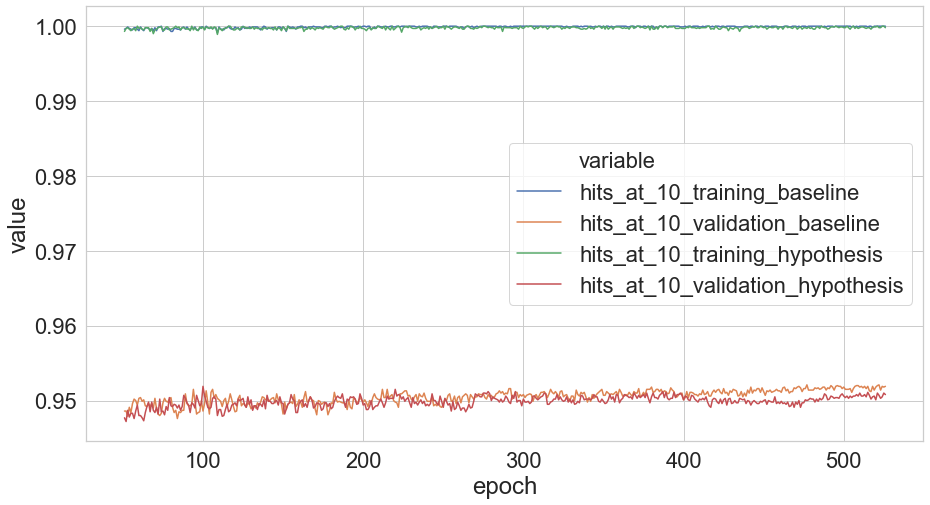

In [37]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[50:], ['epoch']))
plt.savefig('WN18_hits_at_10_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [38]:
path = get_path('hntn_train_validate_and_test_wn18_200d_hits_at_3.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_hits_at_3.csv'

In [39]:
results_hits_at_3 = pd.read_csv(path)
results_hits_at_3.head()

,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,0.0004,0.0002,0.0000,0.0000,0.0001,0.0002
1,0.0134,0.0147,0.0144,0.0134,0.0152,0.0168
2,0.0165,0.0142,0.0139,0.0206,0.0181,0.0205
3,0.0151,0.0140,0.0140,0.0227,0.0206,0.0219
4,0.0199,0.0200,0.0205,0.0231,0.0244,0.0248


In [40]:
results_hits_at_3 = results_hits_at_3.reset_index()
results_hits_at_3.head()

,index,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,0,0.0004,0.0002,0.0000,0.0000,0.0001,0.0002
1,1,0.0134,0.0147,0.0144,0.0134,0.0152,0.0168
2,2,0.0165,0.0142,0.0139,0.0206,0.0181,0.0205
3,3,0.0151,0.0140,0.0140,0.0227,0.0206,0.0219
4,4,0.0199,0.0200,0.0205,0.0231,0.0244,0.0248


In [41]:
results_hits_at_3 = results_hits_at_3.rename(columns={'index': 'epoch'})
results_hits_at_3.head()

,epoch,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,0,0.0004,0.0002,0.0000,0.0000,0.0001,0.0002
1,1,0.0134,0.0147,0.0144,0.0134,0.0152,0.0168
2,2,0.0165,0.0142,0.0139,0.0206,0.0181,0.0205
3,3,0.0151,0.0140,0.0140,0.0227,0.0206,0.0219
4,4,0.0199,0.0200,0.0205,0.0231,0.0244,0.0248


In [42]:
results_hits_at_3['epoch'] += 1
results_hits_at_3.head()

,epoch,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,1,0.0004,0.0002,0.0000,0.0000,0.0001,0.0002
1,2,0.0134,0.0147,0.0144,0.0134,0.0152,0.0168
2,3,0.0165,0.0142,0.0139,0.0206,0.0181,0.0205
3,4,0.0151,0.0140,0.0140,0.0227,0.0206,0.0219
4,5,0.0199,0.0200,0.0205,0.0231,0.0244,0.0248


In [43]:
results_hits_at_3_test = results_hits_at_3[['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis']]
results_hits_at_3_test.head()

,hits_at_3_test_baseline,hits_at_3_test_hypothesis
0,0.0000,0.0002
1,0.0144,0.0168
2,0.0139,0.0205
3,0.0140,0.0219
4,0.0205,0.0248


In [44]:
results_hits_at_3_test.max()

hits_at_3_test_baseline      0.9535
hits_at_3_test_hypothesis    0.9523
dtype: float64

In [45]:
results_hits_at_3 = results_hits_at_3.drop(['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis'], axis=1)
results_hits_at_3.head()

,epoch,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis
0,1,0.0004,0.0002,0.0000,0.0001
1,2,0.0134,0.0147,0.0134,0.0152
2,3,0.0165,0.0142,0.0206,0.0181
3,4,0.0151,0.0140,0.0227,0.0206
4,5,0.0199,0.0200,0.0231,0.0244


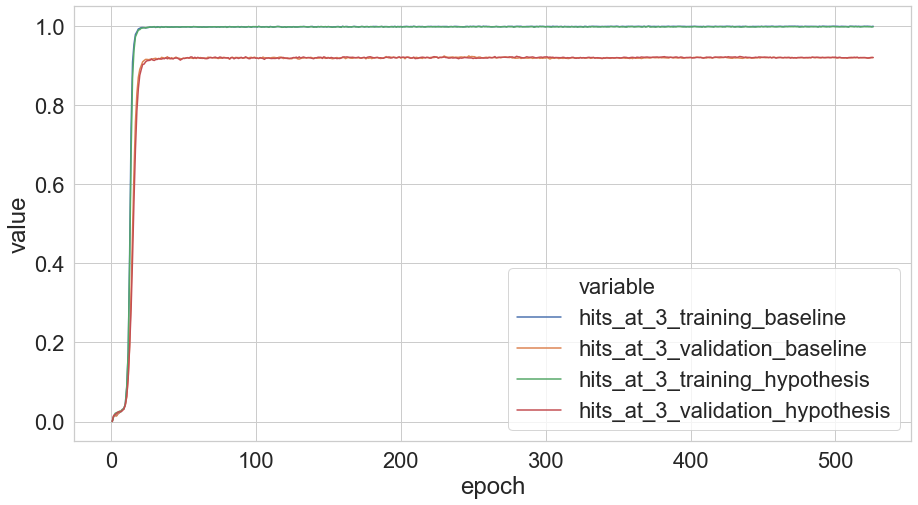

In [46]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3, ['epoch']))
plt.savefig('WN18_hits_at_3_Results.png', bbox_inches = "tight", format='PNG')

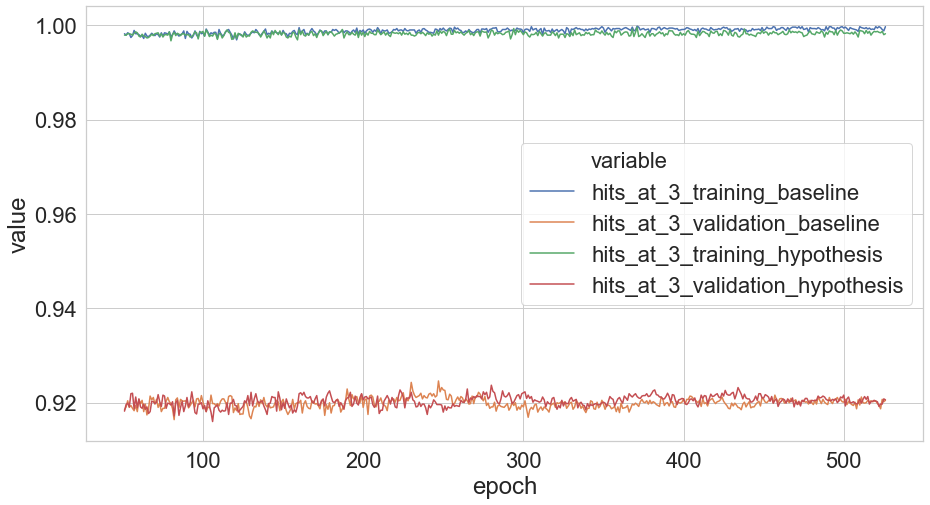

In [47]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[50:], ['epoch']))
plt.savefig('WN18_hits_at_3_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [48]:
path = get_path('hntn_train_validate_and_test_wn18_200d_hits_at_1.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_hits_at_1.csv'

In [49]:
results_hits_at_1 = pd.read_csv(path)
results_hits_at_1.head()

,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,0.0002,0.0000,0.0000,0.0000,0.0001,0.0001
1,0.0046,0.0058,0.0055,0.0046,0.0055,0.0062
2,0.0085,0.0065,0.0080,0.0116,0.0104,0.0133
3,0.0061,0.0063,0.0069,0.0133,0.0130,0.0140
4,0.0075,0.0076,0.0086,0.0143,0.0136,0.0155


In [50]:
results_hits_at_1 = results_hits_at_1.reset_index()
results_hits_at_1.head()

,index,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,0,0.0002,0.0000,0.0000,0.0000,0.0001,0.0001
1,1,0.0046,0.0058,0.0055,0.0046,0.0055,0.0062
2,2,0.0085,0.0065,0.0080,0.0116,0.0104,0.0133
3,3,0.0061,0.0063,0.0069,0.0133,0.0130,0.0140
4,4,0.0075,0.0076,0.0086,0.0143,0.0136,0.0155


In [51]:
results_hits_at_1 = results_hits_at_1.rename(columns={'index': 'epoch'})
results_hits_at_1.head()

,epoch,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,0,0.0002,0.0000,0.0000,0.0000,0.0001,0.0001
1,1,0.0046,0.0058,0.0055,0.0046,0.0055,0.0062
2,2,0.0085,0.0065,0.0080,0.0116,0.0104,0.0133
3,3,0.0061,0.0063,0.0069,0.0133,0.0130,0.0140
4,4,0.0075,0.0076,0.0086,0.0143,0.0136,0.0155


In [52]:
results_hits_at_1['epoch'] += 1
results_hits_at_1.head()

,epoch,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,1,0.0002,0.0000,0.0000,0.0000,0.0001,0.0001
1,2,0.0046,0.0058,0.0055,0.0046,0.0055,0.0062
2,3,0.0085,0.0065,0.0080,0.0116,0.0104,0.0133
3,4,0.0061,0.0063,0.0069,0.0133,0.0130,0.0140
4,5,0.0075,0.0076,0.0086,0.0143,0.0136,0.0155


In [53]:
results_hits_at_1_test = results_hits_at_1[['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis']]
results_hits_at_1_test.head()

,hits_at_1_test_baseline,hits_at_1_test_hypothesis
0,0.0000,0.0001
1,0.0055,0.0062
2,0.0080,0.0133
3,0.0069,0.0140
4,0.0086,0.0155


In [54]:
results_hits_at_1_test.max()

hits_at_1_test_baseline      0.9470
hits_at_1_test_hypothesis    0.9466
dtype: float64

In [55]:
results_hits_at_1 = results_hits_at_1.drop(['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis'], axis=1)
results_hits_at_1.head()

,epoch,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis
0,1,0.0002,0.0000,0.0000,0.0001
1,2,0.0046,0.0058,0.0046,0.0055
2,3,0.0085,0.0065,0.0116,0.0104
3,4,0.0061,0.0063,0.0133,0.0130
4,5,0.0075,0.0076,0.0143,0.0136


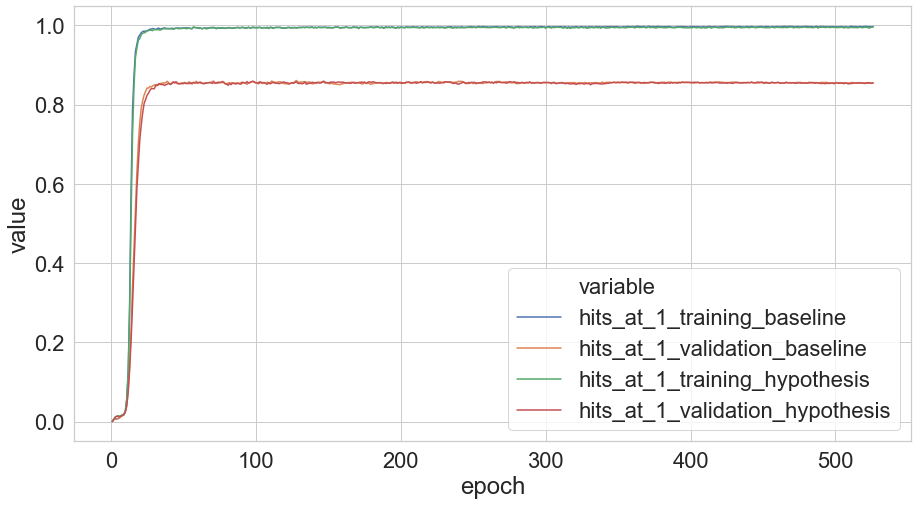

In [56]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1, ['epoch']))
plt.savefig('WN18_hits_at_1_Results.png', bbox_inches = "tight", format='PNG')

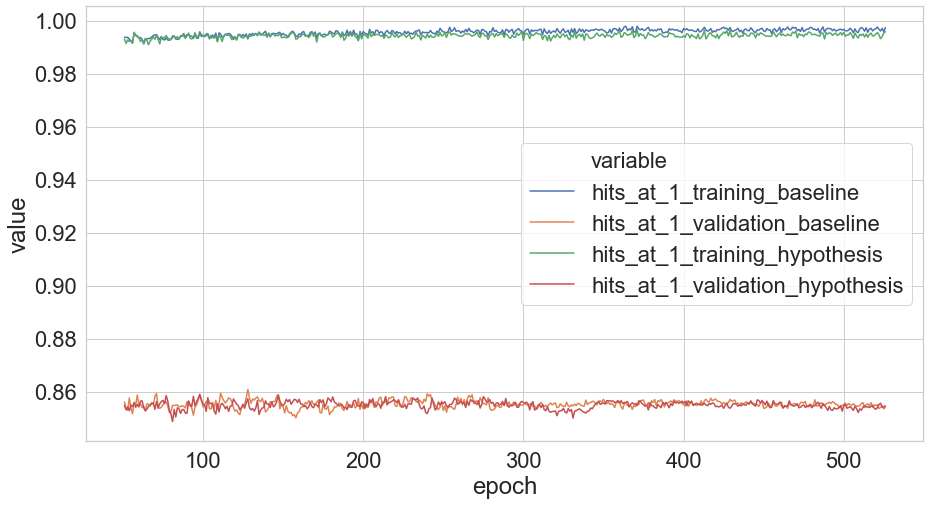

In [57]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[50:], ['epoch']))
plt.savefig('WN18_hits_at_1_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [58]:
path = get_path('hntn_train_validate_and_test_wn18_200d_mean_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_mean_rank.csv'

In [59]:
results_mean_rank = pd.read_csv(path)
results_mean_rank.head()

,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,16039.2498,17387.0054,17735.8406,16740.5734,17862.2262,18080.5773
1,14174.9759,16227.3460,16566.8188,14766.3584,16361.8885,16558.1270
2,12800.8523,15519.1624,15860.8672,13254.7251,15447.2149,15638.8146
3,11688.6667,15381.2500,15646.1670,12069.0357,15119.7486,15208.5196
4,11392.7077,15191.1117,15394.3498,11247.3098,14743.3948,14844.9208


In [60]:
results_mean_rank = results_mean_rank.reset_index()
results_mean_rank.head()

,index,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,0,16039.2498,17387.0054,17735.8406,16740.5734,17862.2262,18080.5773
1,1,14174.9759,16227.3460,16566.8188,14766.3584,16361.8885,16558.1270
2,2,12800.8523,15519.1624,15860.8672,13254.7251,15447.2149,15638.8146
3,3,11688.6667,15381.2500,15646.1670,12069.0357,15119.7486,15208.5196
4,4,11392.7077,15191.1117,15394.3498,11247.3098,14743.3948,14844.9208


In [61]:
results_mean_rank = results_mean_rank.rename(columns={'index': 'epoch'})
results_mean_rank.head()

,epoch,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,0,16039.2498,17387.0054,17735.8406,16740.5734,17862.2262,18080.5773
1,1,14174.9759,16227.3460,16566.8188,14766.3584,16361.8885,16558.1270
2,2,12800.8523,15519.1624,15860.8672,13254.7251,15447.2149,15638.8146
3,3,11688.6667,15381.2500,15646.1670,12069.0357,15119.7486,15208.5196
4,4,11392.7077,15191.1117,15394.3498,11247.3098,14743.3948,14844.9208


In [62]:
results_mean_rank['epoch'] += 1
results_mean_rank.head()

,epoch,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,1,16039.2498,17387.0054,17735.8406,16740.5734,17862.2262,18080.5773
1,2,14174.9759,16227.3460,16566.8188,14766.3584,16361.8885,16558.1270
2,3,12800.8523,15519.1624,15860.8672,13254.7251,15447.2149,15638.8146
3,4,11688.6667,15381.2500,15646.1670,12069.0357,15119.7486,15208.5196
4,5,11392.7077,15191.1117,15394.3498,11247.3098,14743.3948,14844.9208


In [63]:
results_mean_rank_test = results_mean_rank[['mean_rank_test_baseline', 'mean_rank_test_hypothesis']]
results_mean_rank_test.head()

,mean_rank_test_baseline,mean_rank_test_hypothesis
0,17735.8406,18080.5773
1,16566.8188,16558.1270
2,15860.8672,15638.8146
3,15646.1670,15208.5196
4,15394.3498,14844.9208


In [65]:
results_mean_rank_test.min()

mean_rank_test_baseline      510.2483
mean_rank_test_hypothesis    431.2008
dtype: float64

In [66]:
results_mean_rank = results_mean_rank.drop(['mean_rank_test_baseline', 'mean_rank_test_hypothesis'], axis=1)
results_mean_rank.head()

,epoch,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis
0,1,16039.2498,17387.0054,16740.5734,17862.2262
1,2,14174.9759,16227.3460,14766.3584,16361.8885
2,3,12800.8523,15519.1624,13254.7251,15447.2149
3,4,11688.6667,15381.2500,12069.0357,15119.7486
4,5,11392.7077,15191.1117,11247.3098,14743.3948


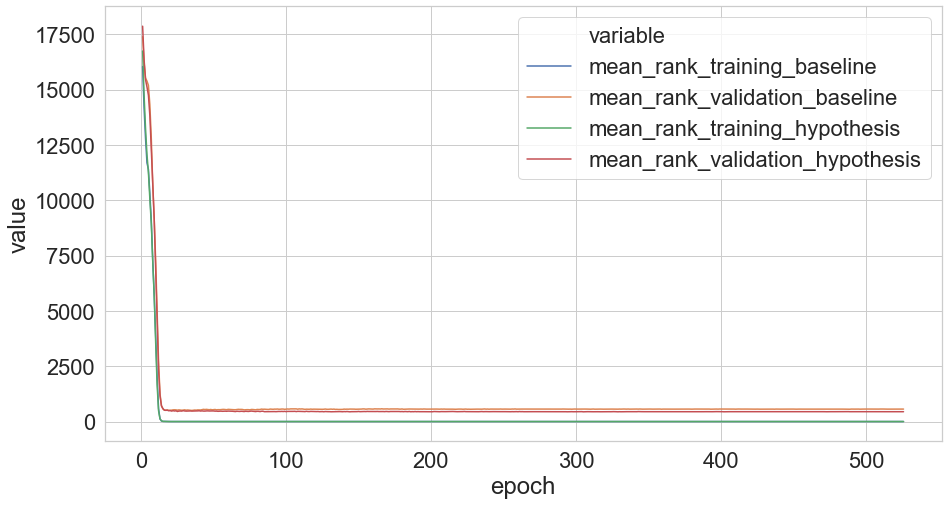

In [67]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank, ['epoch']))
plt.savefig('WN18_mean_rank_Results.png', bbox_inches = "tight", format='PNG')

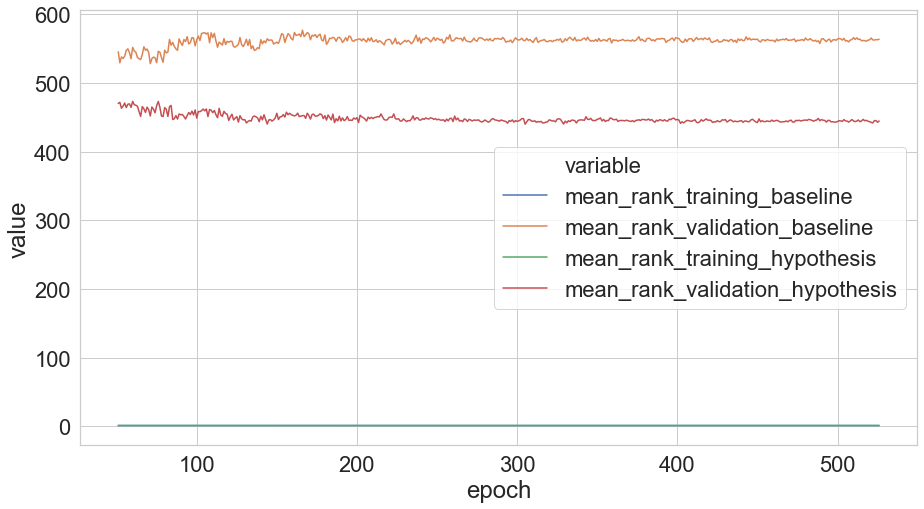

In [68]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[50:], ['epoch']))
plt.savefig('WN18_mean_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [69]:
path = get_path('hntn_train_validate_and_test_wn18_200d_mean_reciprocal_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_mean_reciprocal_rank.csv'

In [70]:
results_mean_reciprocal_rank = pd.read_csv(path)
results_mean_reciprocal_rank.head()

,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,0.000786,0.000502,0.000465,0.000330,0.000449,0.000487
1,0.012427,0.013989,0.013580,0.011882,0.013523,0.014429
2,0.017554,0.015896,0.015928,0.020120,0.018909,0.020622
3,0.015791,0.015529,0.015431,0.023178,0.022488,0.022482
4,0.019341,0.019498,0.019733,0.024380,0.024863,0.025506


In [71]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.reset_index()
results_mean_reciprocal_rank.head()

,index,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,0,0.000786,0.000502,0.000465,0.000330,0.000449,0.000487
1,1,0.012427,0.013989,0.013580,0.011882,0.013523,0.014429
2,2,0.017554,0.015896,0.015928,0.020120,0.018909,0.020622
3,3,0.015791,0.015529,0.015431,0.023178,0.022488,0.022482
4,4,0.019341,0.019498,0.019733,0.024380,0.024863,0.025506


In [72]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.rename(columns={'index': 'epoch'})
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,0,0.000786,0.000502,0.000465,0.000330,0.000449,0.000487
1,1,0.012427,0.013989,0.013580,0.011882,0.013523,0.014429
2,2,0.017554,0.015896,0.015928,0.020120,0.018909,0.020622
3,3,0.015791,0.015529,0.015431,0.023178,0.022488,0.022482
4,4,0.019341,0.019498,0.019733,0.024380,0.024863,0.025506


In [73]:
results_mean_reciprocal_rank['epoch'] += 1
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,1,0.000786,0.000502,0.000465,0.000330,0.000449,0.000487
1,2,0.012427,0.013989,0.013580,0.011882,0.013523,0.014429
2,3,0.017554,0.015896,0.015928,0.020120,0.018909,0.020622
3,4,0.015791,0.015529,0.015431,0.023178,0.022488,0.022482
4,5,0.019341,0.019498,0.019733,0.024380,0.024863,0.025506


In [74]:
results_mean_reciprocal_rank_test = results_mean_reciprocal_rank[['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis']]
results_mean_reciprocal_rank_test.head()

,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_test_hypothesis
0,0.000465,0.000487
1,0.013580,0.014429
2,0.015928,0.020622
3,0.015431,0.022482
4,0.019733,0.025506


In [75]:
results_mean_reciprocal_rank_test.max()

mean_reciprocal_rank_test_baseline      0.950545
mean_reciprocal_rank_test_hypothesis    0.949893
dtype: float64

In [76]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.drop(['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis'], axis=1)
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis
0,1,0.000786,0.000502,0.000330,0.000449
1,2,0.012427,0.013989,0.011882,0.013523
2,3,0.017554,0.015896,0.020120,0.018909
3,4,0.015791,0.015529,0.023178,0.022488
4,5,0.019341,0.019498,0.024380,0.024863


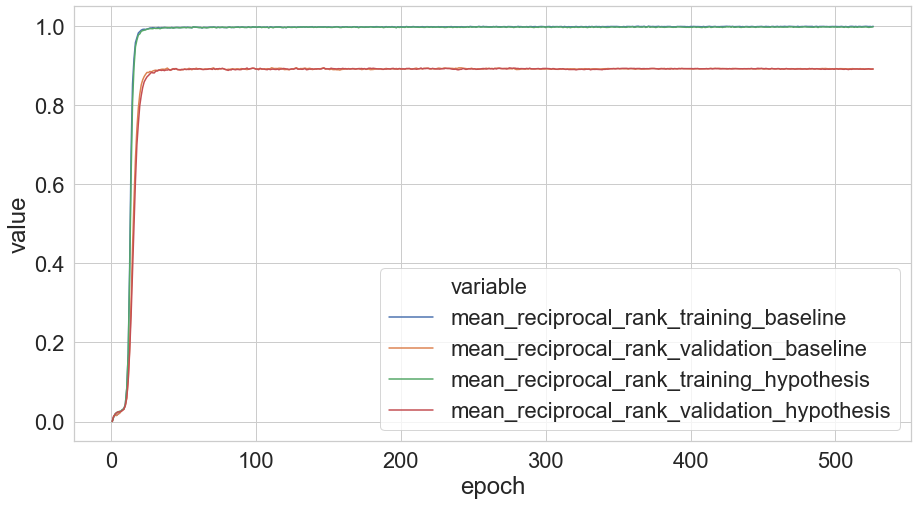

In [77]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank, ['epoch']))
plt.savefig('WN18_mean_reciprocal_rank_Results.png', bbox_inches = "tight", format='PNG')

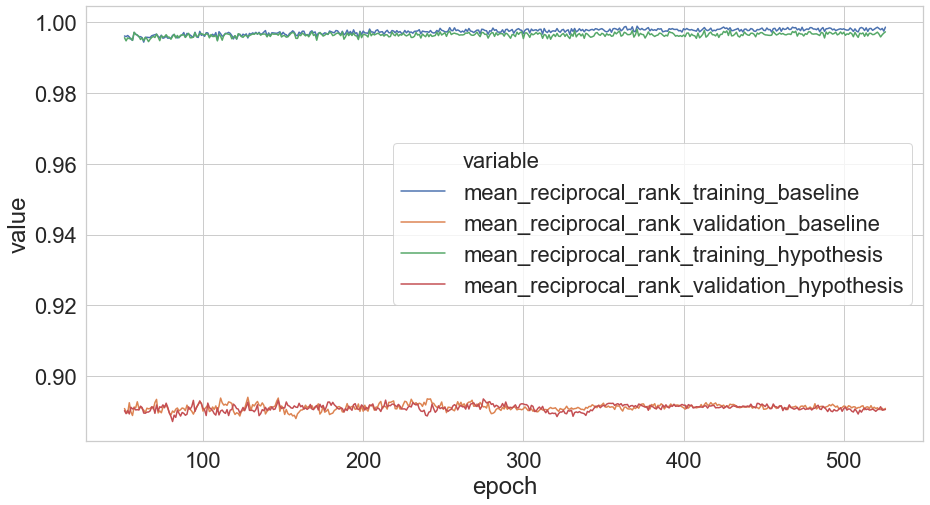

In [78]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[50:], ['epoch']))
plt.savefig('WN18_mean_reciprocal_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')